In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import swarmplot
from pathlib import Path
import datetime
from ydata_profiling import ProfileReport
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

#ARIMA
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from statsmodels.tools.eval_measures import rmse

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

import pmdarima as pm
#from fbprophet import Prophet

import xgboost as xgb


from pandas import to_datetime
from pmdarima.model_selection import train_test_split
from numpy import *

from sklearn import datasets, linear_model
from sklearn.datasets import load_wine
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from scipy.stats import pearsonr

%matplotlib inline

import random
from numpy import * 
from sklearn.metrics import roc_curve, auc

import itertools
import warnings
import time

from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError
from sklearn.metrics import r2_score,mean_absolute_error


warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

In [25]:
def load_demand_full_data():
    return pd.read_csv(Path("C:/Users/User/Documents/UNSW_Data Science 7446/ZZSC9020 Data Science Capstone Project/Data/model_data_v4.csv"))

In [26]:
dem_data = load_demand_full_data()

In [27]:
dem_data.head()

,year,month,date,temp_mean,temp_min,temp_max,temp_avg_daily_min,temp_avg_daily_max,degree_days,demand_mean,demand_max,demand_avg_daily_max,total_consumption,pv_capacity,population,gsp
0,2010,1,2010-01-01,20.868008,1.6,41.1,16.380645,25.858065,144.511358,8941.450389,13765.04,10613.530000,6554083.135,28278.392,7110454,44504.25
1,2010,2,2010-02-01,20.218907,3.2,35.4,16.146429,24.682143,124.982743,8855.467677,13377.27,10380.667857,5831325.465,32153.986,7119405,44504.25
2,2010,3,2010-03-01,19.828286,6.3,34.7,15.496774,24.725806,106.809763,8698.725127,11991.47,10132.978710,6319623.805,38195.588,7128356,44504.25
3,2010,4,2010-04-01,17.593856,6.5,29.9,12.780000,23.063333,68.136038,8452.863411,11436.13,9804.072333,5984627.295,45142.723,7133668,44504.25
4,2010,5,2010-05-01,15.323485,3.1,28.4,11.187097,19.596774,123.937772,8897.770510,12386.49,10558.023548,6459781.390,54370.332,7138980,44504.25


In [28]:
peakDemand = dem_data.drop([ 'year', 'month', 'date','temp_mean', 'temp_min', 'temp_max', 'demand_mean','temp_avg_daily_min','demand_max', 'total_consumption', 'gsp','degree_days'], axis=1)

In [29]:
peakDemand.head()

,temp_avg_daily_max,demand_avg_daily_max,pv_capacity,population
0,25.858065,10613.530000,28278.392,7110454
1,24.682143,10380.667857,32153.986,7119405
2,24.725806,10132.978710,38195.588,7128356
3,23.063333,9804.072333,45142.723,7133668
4,19.596774,10558.023548,54370.332,7138980


In [30]:
peakDemand_w_DD = dem_data.drop([ 'year', 'month', 'date','temp_mean', 'temp_min', 'temp_max', 'demand_mean','demand_max', 'total_consumption', 'gsp','temp_avg_daily_max','temp_avg_daily_min'], axis=1)

In [31]:
peakDemand_w_DD.head()

,degree_days,demand_avg_daily_max,pv_capacity,population
0,144.511358,10613.530000,28278.392,7110454
1,124.982743,10380.667857,32153.986,7119405
2,106.809763,10132.978710,38195.588,7128356
3,68.136038,9804.072333,45142.723,7133668
4,123.937772,10558.023548,54370.332,7138980


In [32]:
peakDemand_w_DD.to_csv(Path("C:/Users/User/Documents/UNSW_Data Science 7446/ZZSC9020 Data Science Capstone Project/Data/peakDemand_W_DD.txt"),  sep=',', index=False, header=None)

In [33]:
peakDemand.to_csv(Path("C:/Users/User/Documents/UNSW_Data Science 7446/ZZSC9020 Data Science Capstone Project/Data/peakDemand.txt"),  sep=',', index=False, header=None)

In [34]:

# min_max = MinMaxScaler()

# peakDemand_min_max = min_max.fit_transform(peakDemand)
# peakDemand_w_DD_min_max = min_max.fit_transform(peakDemand_w_DD)

In [35]:
# scaled_df_peakDemand = pd.DataFrame(peakDemand_min_max, columns=[ 'temp_avg_daily_max', 'demand_avg_daily_max',
#        'pv_capacity', 'population'])

In [36]:
# scaled_df_peakDemand_w_DD_min_max = pd.DataFrame(peakDemand_w_DD_min_max, columns=['degree_days', 'demand_avg_daily_max',
#        'pv_capacity', 'population'])

## Linear Regression - Peak Demand 

In [37]:
datafile = "C:/Users/User/Documents/UNSW_Data Science 7446/ZZSC9020 Data Science Capstone Project/Data/peakDemand.txt"

In [38]:
def get_data(datafile, normalise, i): 

    data_in = genfromtxt(datafile, delimiter=",") # in case of csv data
 

    data_inputx = data_in[:,[0,2,3]]  # three features   

    if normalise == True:
        transformer = Normalizer().fit(data_inputx)  # fit does nothing.
        data_inputx = transformer.transform(data_inputx)
 


    data_inputy = data_in[:,1] # this is target - second column from the data

    percent_test = 0.4
    testsize = int(percent_test * data_inputx.shape[0]) 
    x_train = data_inputx[:-testsize]
    x_test = data_inputx[-testsize:] 
    y_train = data_inputy[:-testsize]
    y_test = data_inputy[-testsize:]


    #another way you can use scikit-learn train test split with random state
    x_train, x_test, y_train, y_test = train_test_split(data_inputx, data_inputy, test_size=percent_test, random_state=i)

    return x_train, x_test, y_train, y_test

In [39]:
def scikit_linear_mod(x_train, x_test, y_train, y_test): 
 
    regr = linear_model.LinearRegression()

 
    # Train the model using the training sets
    regr.fit(x_train, y_train)
    

    # Make predictions using the testing set
    y_pred = regr.predict(x_test)
 
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))  
    rsquared = r2_score(y_test, y_pred) 
 
    residuals = y_pred - y_test
    plt.plot(residuals, linewidth=1)
 
    plt.savefig('scikit_linear.png')
    plt.show()

    sns.regplot(x=y_test,y=y_pred,ci=None,color ='orange');
    plt.xlabel('Actual');
    plt.ylabel('Predicted');
    plt.savefig('regression_plot_2 features.png')
    plt.show()
    
    return rmse, rsquared, regr.coef_

## Linear Regression (Peak Demand) - One Test without Normalisation

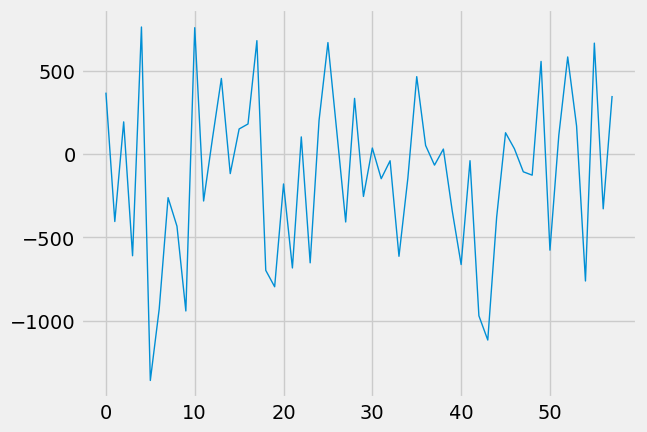

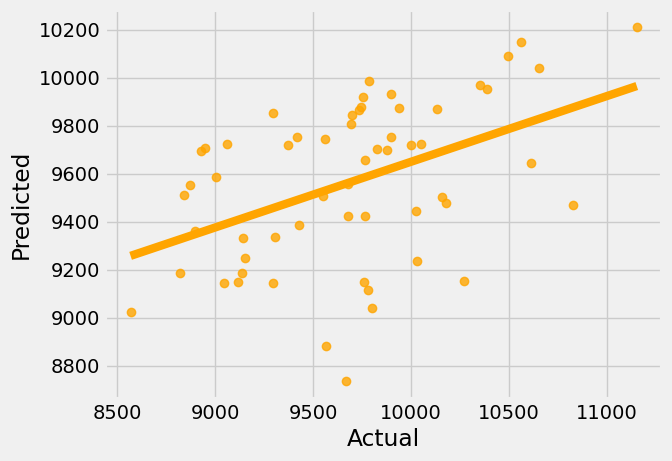

RMSE: 513.8884177514325
R-Squared: 0.13242643413235766
Coefficients: [-8.32931167e+01 -1.07851630e-04 -3.87268192e-04]


In [40]:
normalise = False
x_train, x_test, y_train, y_test = get_data(datafile, normalise, 42)
rmse, rsquared, coef = scikit_linear_mod(x_train, x_test, y_train, y_test)
print('RMSE:', rmse)
print('R-Squared:', rsquared)
print('Coefficients:', coef)


## Linear Regression (Peak Demand) - One Test with Normalisation

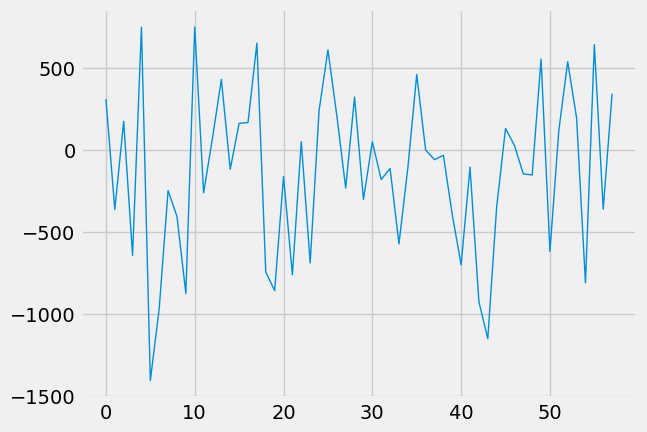

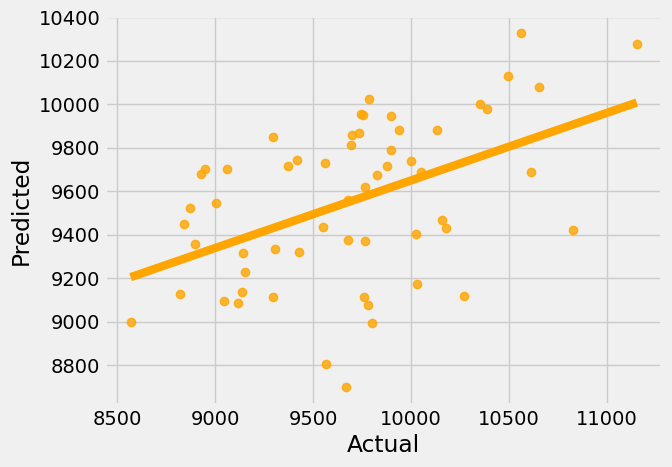

RMSE: 517.4053173543336
R-Squared: 0.12051096894231139
Coefficients: [-7.39327225e+08 -5.96614144e+03 -1.21676137e+04]


In [41]:
normalise = True
x_train, x_test, y_train, y_test = get_data(datafile, normalise, 42)
rmse, rsquared, coef = scikit_linear_mod(x_train, x_test, y_train, y_test)
print('RMSE:', rmse)
print('R-Squared:', rsquared)
print('Coefficients:', coef)

## Linear Regression (Peak Demand) - 30 runs with Normalisation

max_exp = 30
rmse_list = np.zeros(max_exp)
rsq_list = np.zeros(max_exp)

for i in range(0,max_exp):

    x_train, x_test, y_train, y_test = get_data(datafile, normalise, i)
    rmse, rsquared, coef = scikit_linear_mod(x_train, x_test, y_train, y_test)

    rmse_list[i] = rmse
    rsq_list[i] = rsquared 


print('\n List of RMSE:\n', rmse_list)
# Explained variance score: 1 is perfect prediction 
print('\n List of R^2:\n', rsq_list)

mean_rmse = np.mean(rmse_list)
std_rmse = np.std(rmse_list)

mean_rsq = np.mean(rsq_list)
std_rsq = np.std(rsq_list)

print('\n mean_rmse: ', mean_rmse, '\n std_rmse:', std_rmse)
print('\n mean_rsq:', mean_rsq, '\n std_rsq:', std_rsq )

### Linear Model (Peak Demand) with regularisation, Random Forest Regressor and Gradient Boosting Regressor Models 

In [43]:
X = peakDemand.iloc[:,[0,2,3]].values
transformer = MinMaxScaler().fit(X)  # fit does nothing.
X = transformer.transform(X)
y = peakDemand.iloc[:, 1].values

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

In [45]:

pipelines={
'rf':make_pipeline(RandomForestRegressor(random_state=42)),
'gb':make_pipeline(GradientBoostingRegressor(random_state=42)),
'ridge':make_pipeline(Ridge(random_state=42)),
'lasso':make_pipeline(Lasso(random_state=42)),
'enet':make_pipeline(ElasticNet(random_state=42)),
}

In [46]:
hyperparagrid={
'rf':{
'randomforestregressor__min_samples_split':[2,4,6],
'randomforestregressor__min_samples_leaf':[1,2,3]
},
    
'gb':{
    'gradientboostingregressor__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
},

'ridge':{
    'ridge__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
},
'lasso':{
    'lasso__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
},
'enet':{
    'elasticnet__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
}

}

In [47]:
fit_models={}
for algo,pipeline in pipelines.items():
    model=GridSearchCV(pipeline,hyperparagrid[algo],cv=10,n_jobs=-1)
    try:
        print('Start training for {}'.format(algo))
        model.fit(X_train,y_train)
        fit_models[algo]=model
    except NotFittedError as e:
        print(repr(e))

Start training for rf
Start training for gb
Start training for ridge
Start training for lasso
Start training for enet


In [48]:
for algo,model in fit_models.items():
    ya=model.predict(X_test)
    print('{} scores-R2:{} MAE:{}'.format(algo,r2_score(y_test,ya), mean_absolute_error(y_test,ya)))

rf scores-R2:0.7303719448922223 MAE:243.467453374855
gb scores-R2:0.6822310890150391 MAE:242.36080628880163
ridge scores-R2:0.14721068604882448 MAE:407.3790193077694
lasso scores-R2:0.13453107518583973 MAE:408.4981301812038
enet scores-R2:0.14839133819187555 MAE:409.23935302399826


In [49]:
best_model=fit_models['rf']

In [50]:
best_model

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__min_samples_leaf': [1, 2, 3],
                         'randomforestregressor__min_samples_split': [2, 4, 6]})

# Linear Regression using Peak Demand with Degree Days

In [51]:
datafile = "C:/Users/User/Documents/UNSW_Data Science 7446/ZZSC9020 Data Science Capstone Project/Data/peakDemand_W_DD.txt"

## Linear Regression using Peak Demand with Degree Days - One test without Normalisation

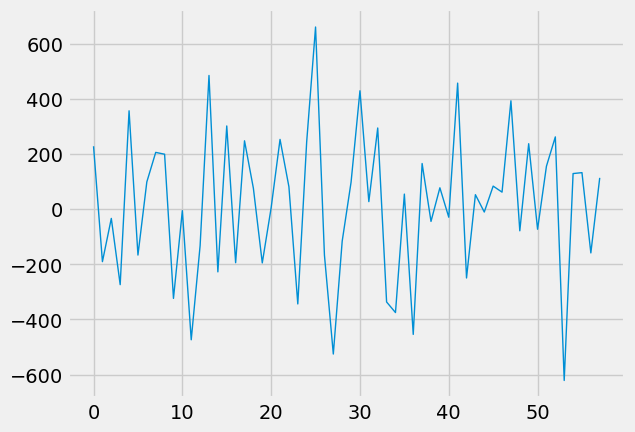

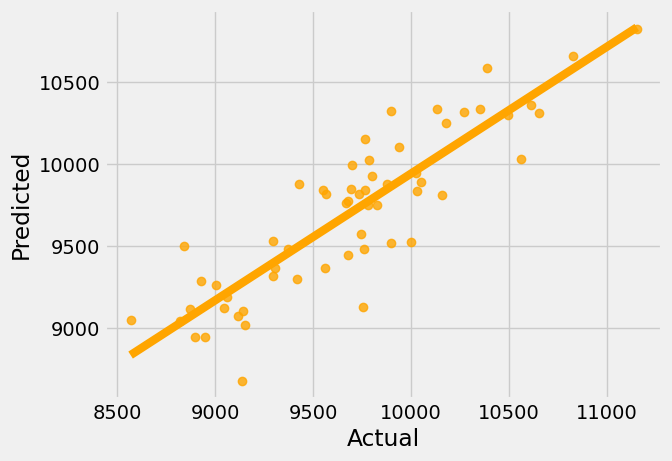

RMSE: 266.7660976935361
R-Squared: 0.7662078505347943
Coefficients: [ 1.43104750e+01  4.78220274e-04 -1.73898877e-03]


In [52]:
normalise = False
x_train, x_test, y_train, y_test = get_data(datafile, normalise, 42)
rmse, rsquared, coef = scikit_linear_mod(x_train, x_test, y_train, y_test)
print('RMSE:', rmse)
print('R-Squared:', rsquared)
print('Coefficients:', coef)

## Linear Regression using Mean Demand - One test with Normalisation

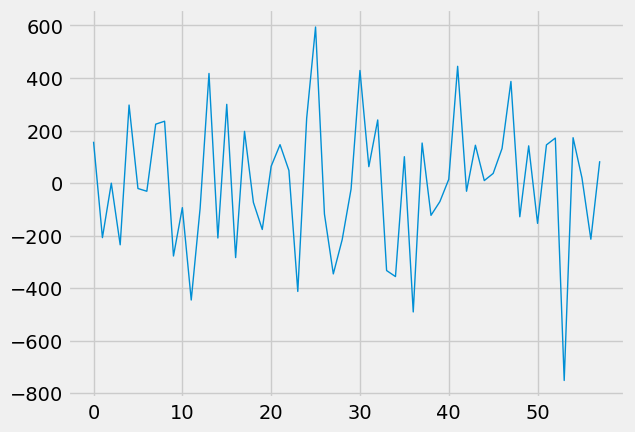

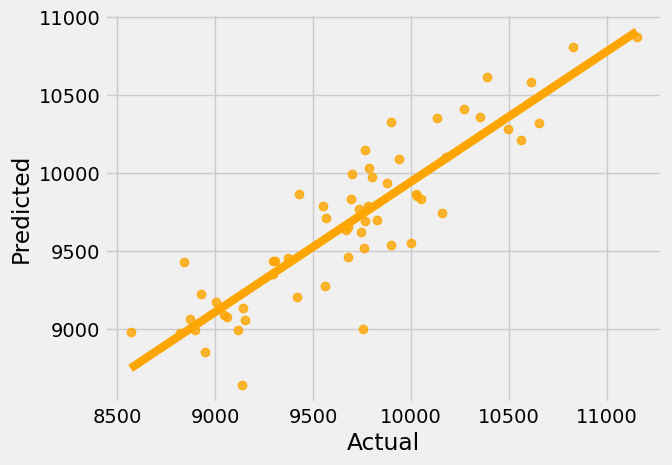

RMSE: 255.60462309630847
R-Squared: 0.7853622726393352
Coefficients: [ 1.17310777e+08 -6.34759578e+03 -3.08334939e+04]


In [53]:
normalise = True
x_train, x_test, y_train, y_test = get_data(datafile, normalise, 42)
rmse, rsquared, coef = scikit_linear_mod(x_train, x_test, y_train, y_test)
print('RMSE:', rmse)
print('R-Squared:', rsquared)
print('Coefficients:', coef)

## Linear Regression using Mean Demand - 30 experimental runs with Normalisation

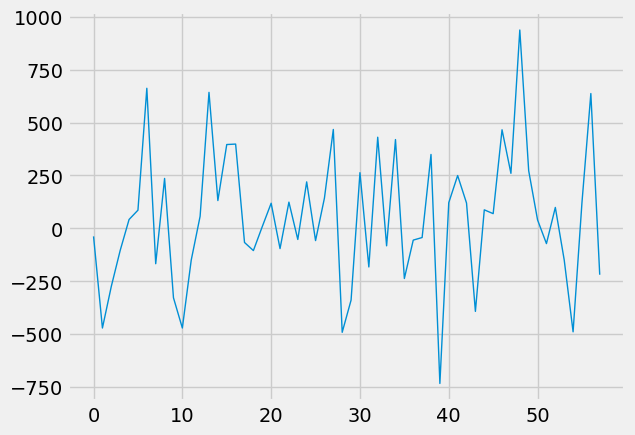

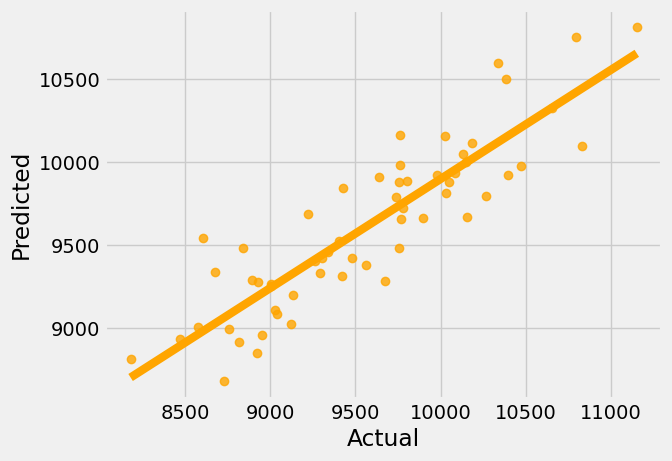

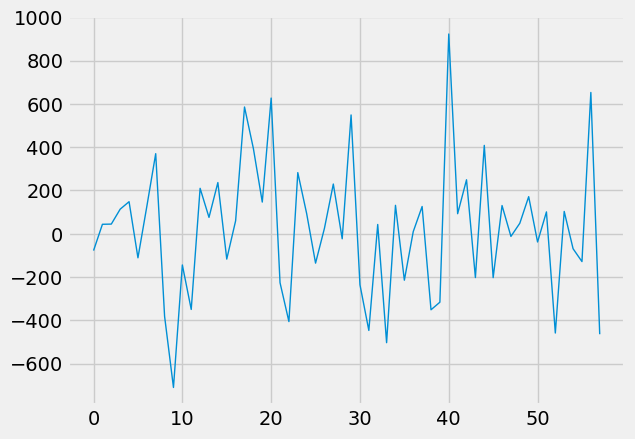

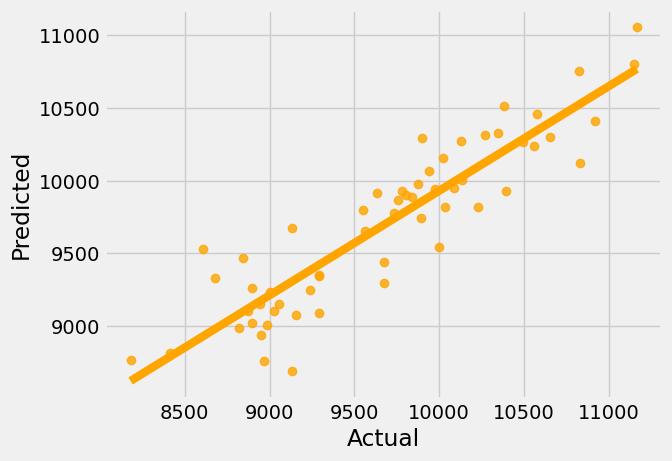

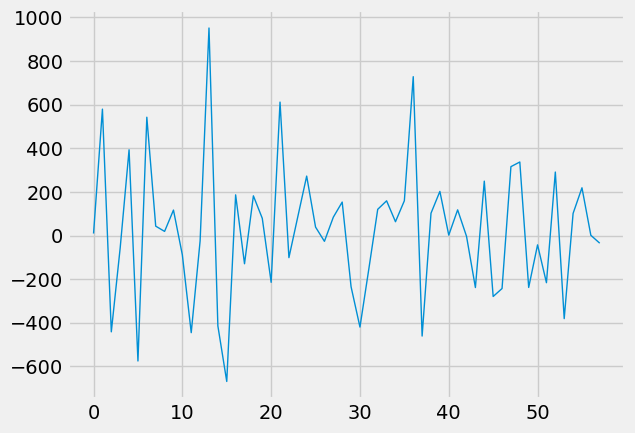

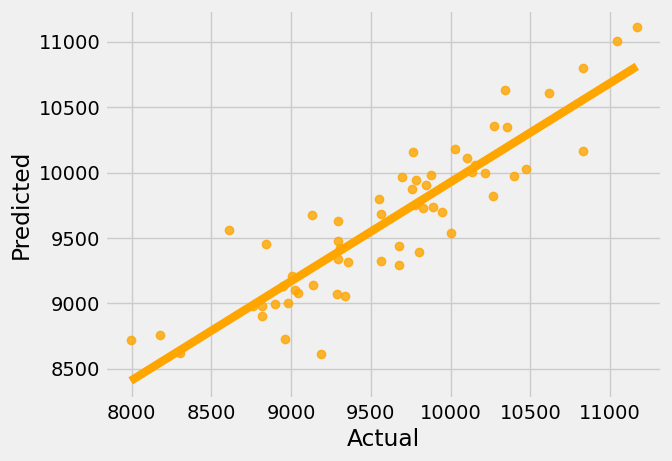

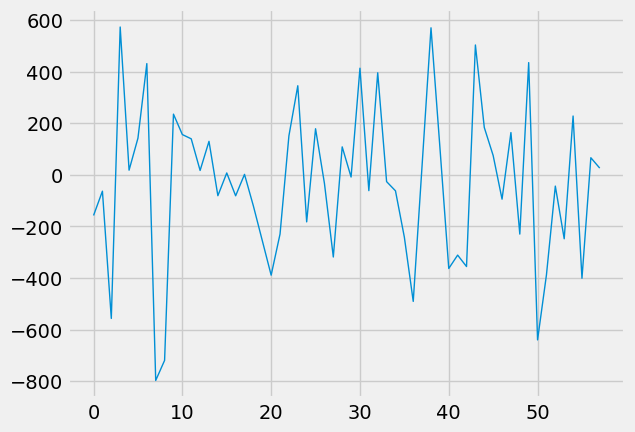

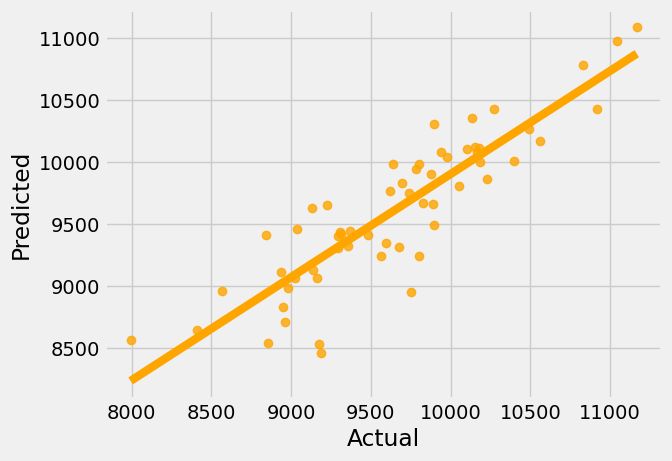

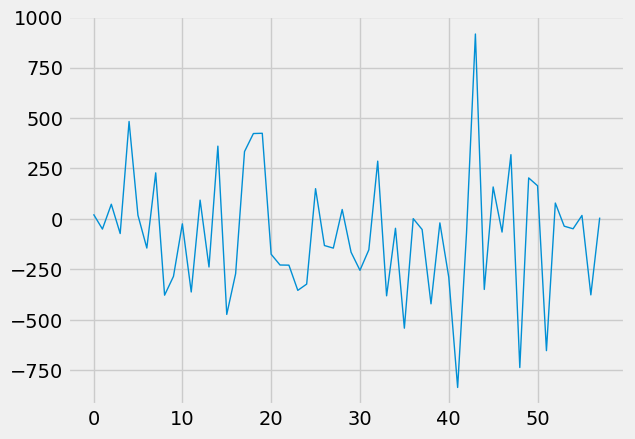

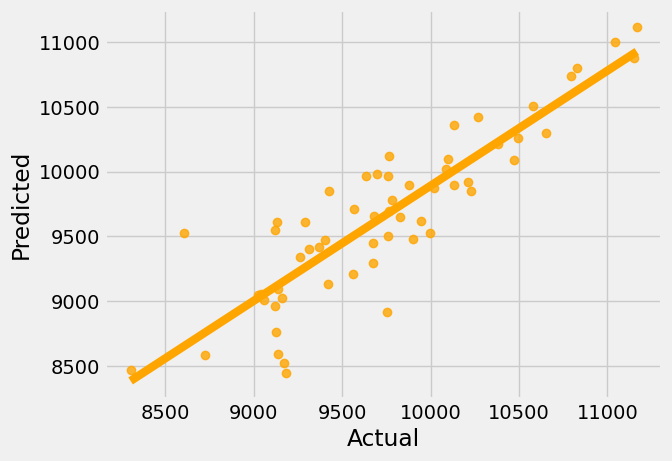

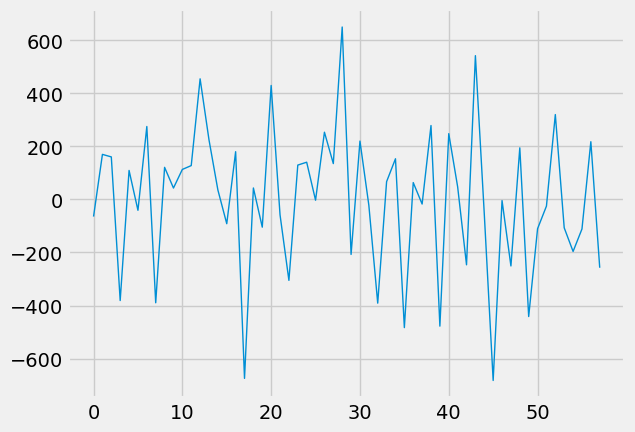

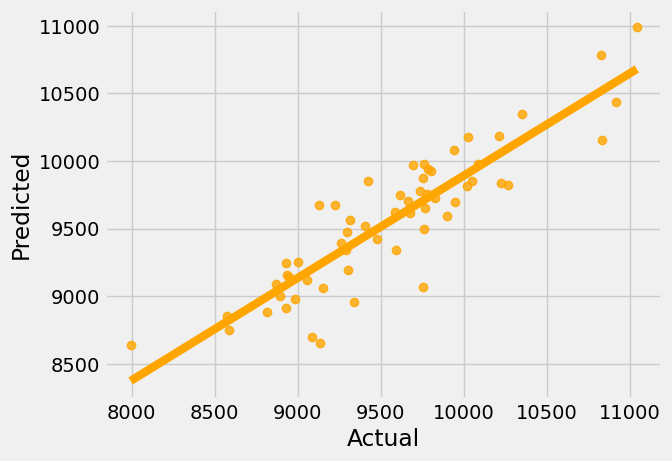

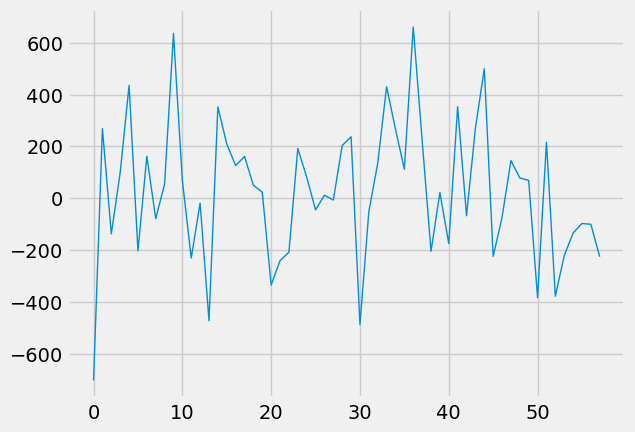

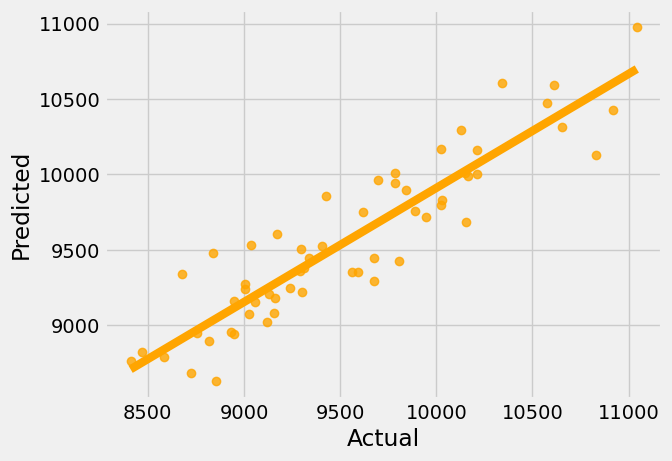

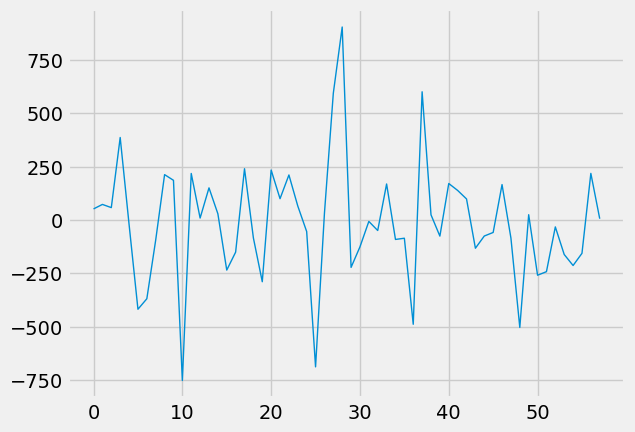

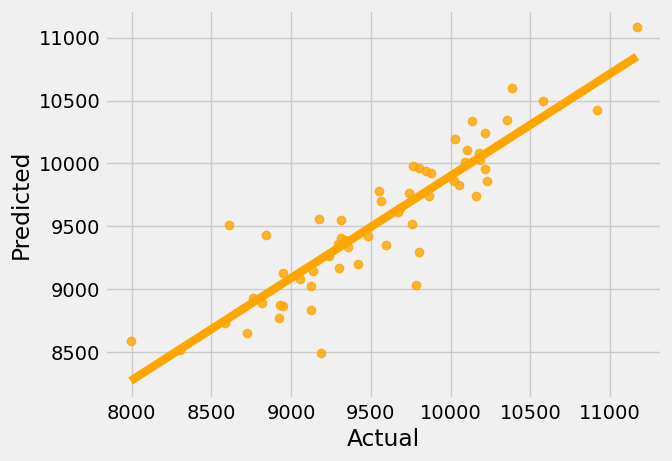

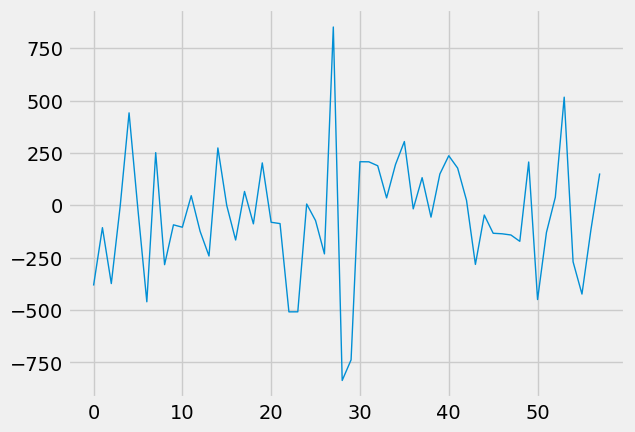

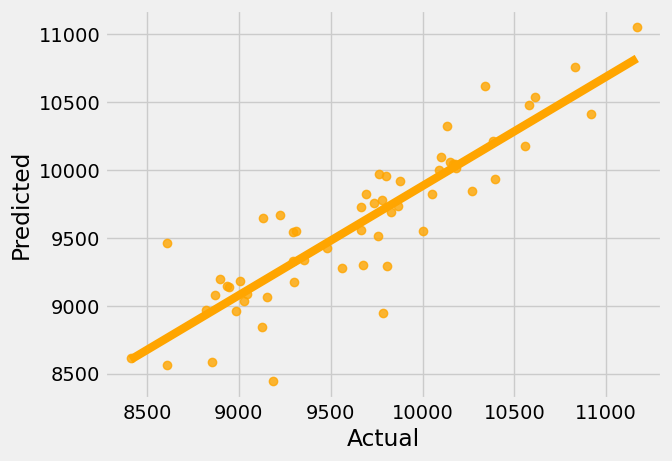

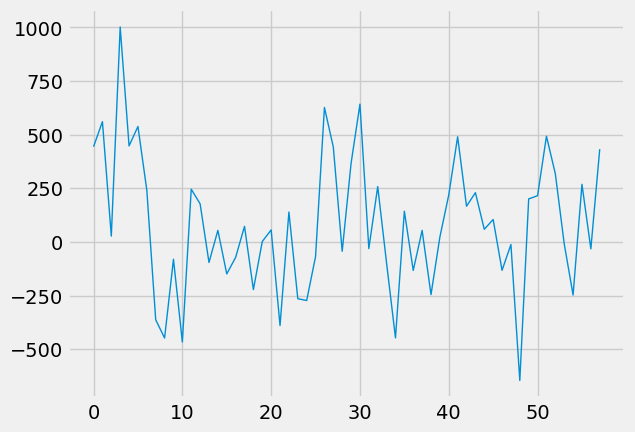

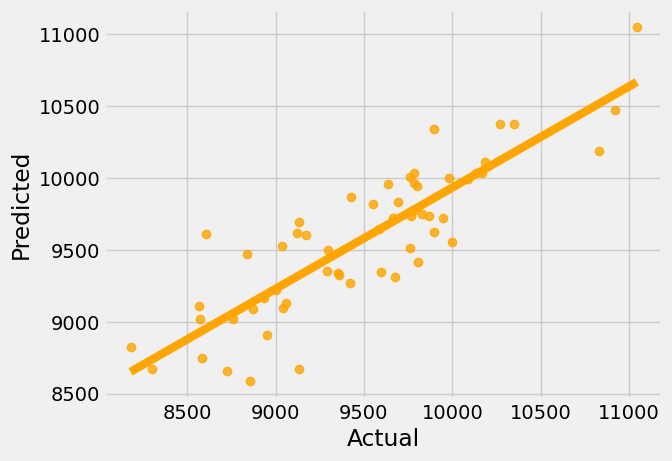

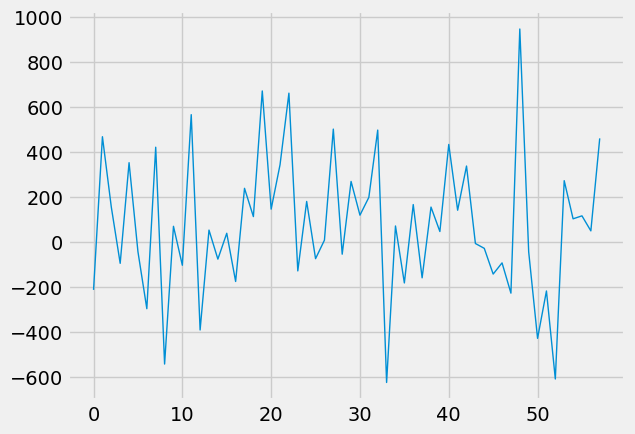

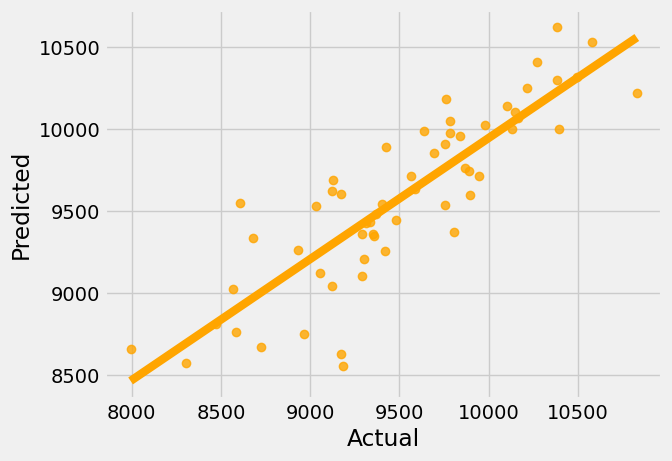

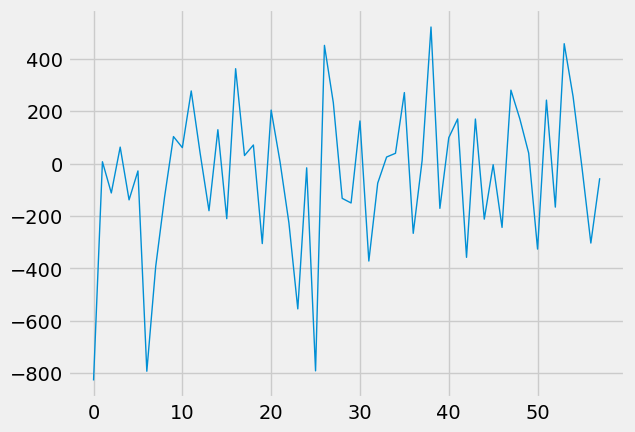

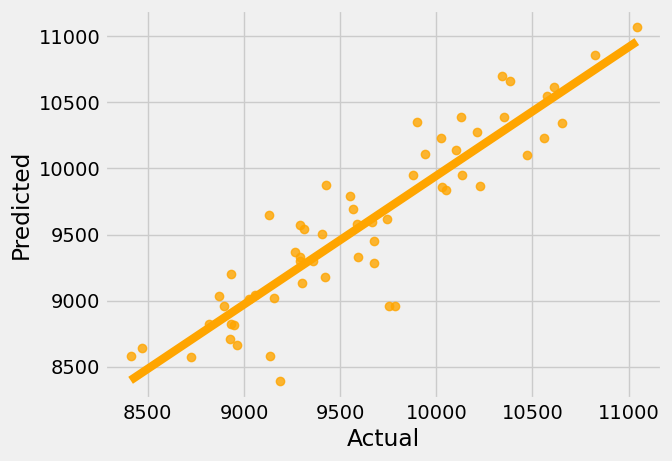

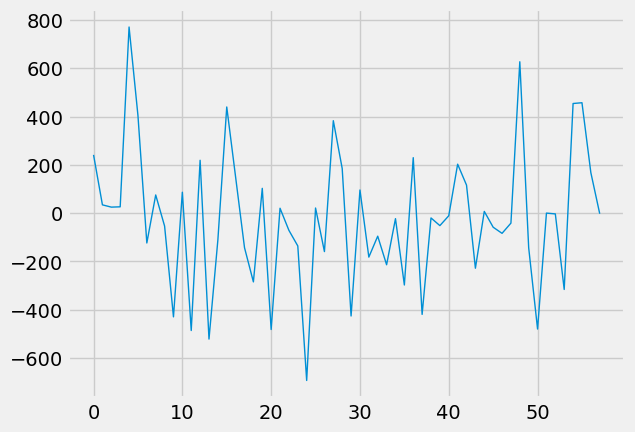

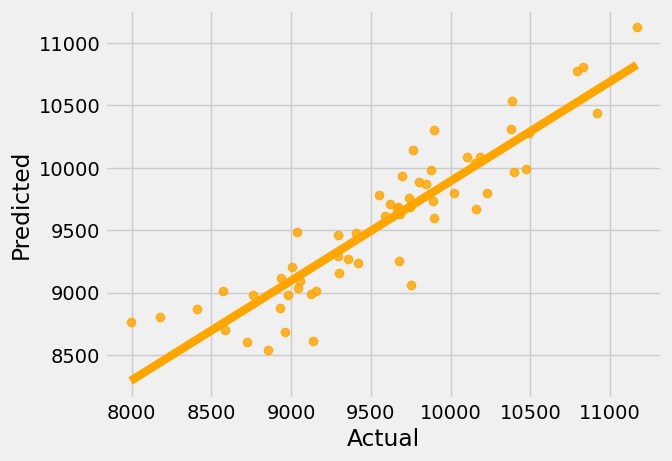

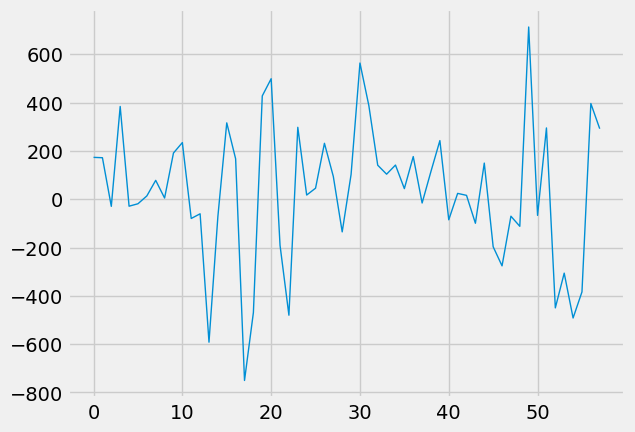

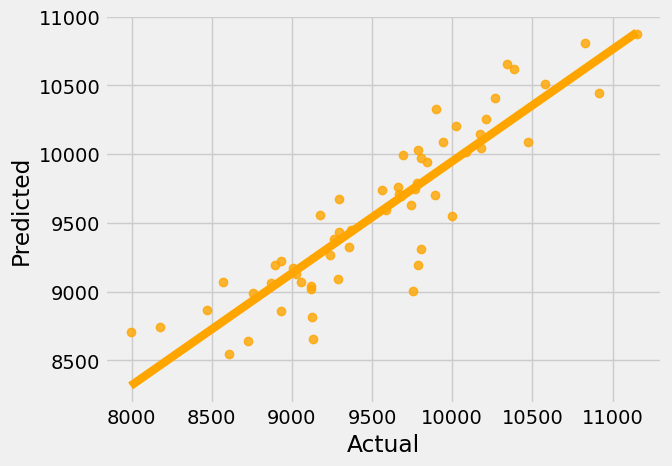

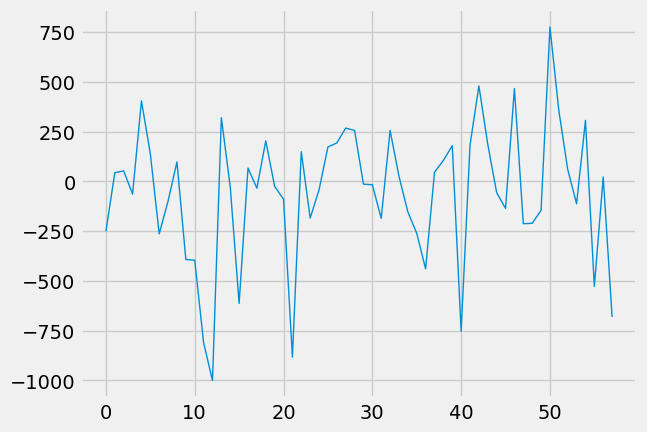

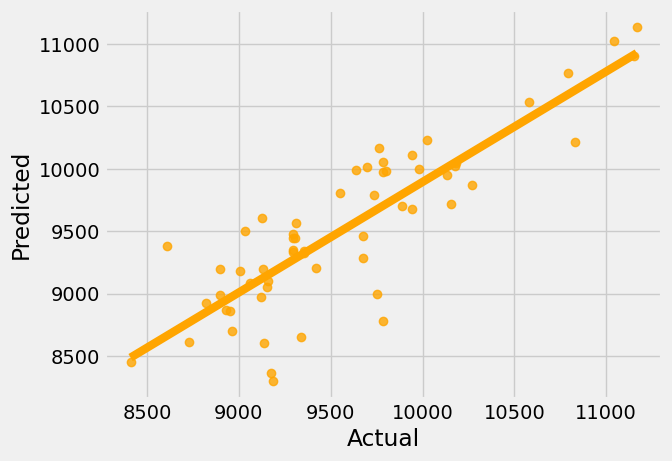

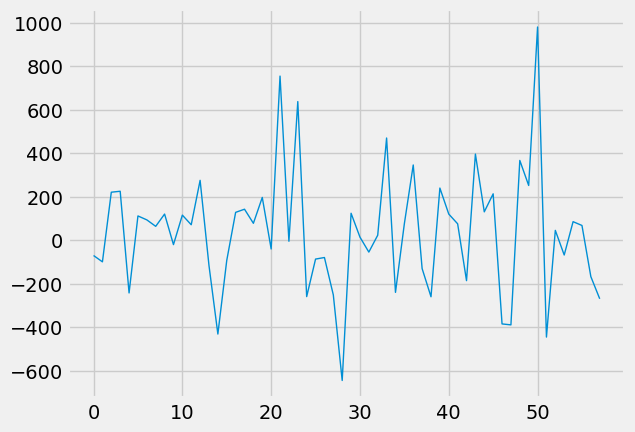

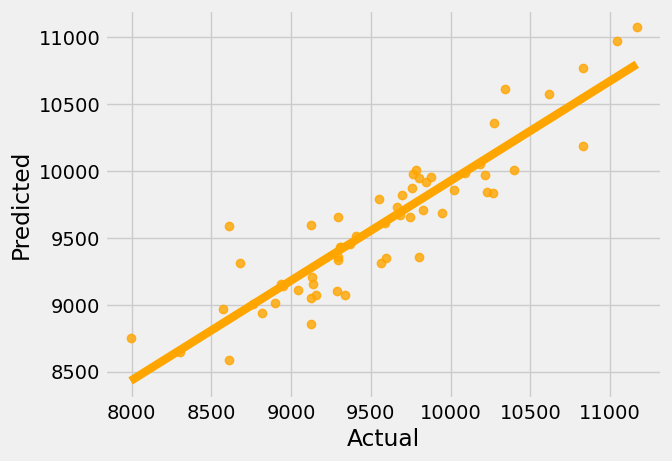

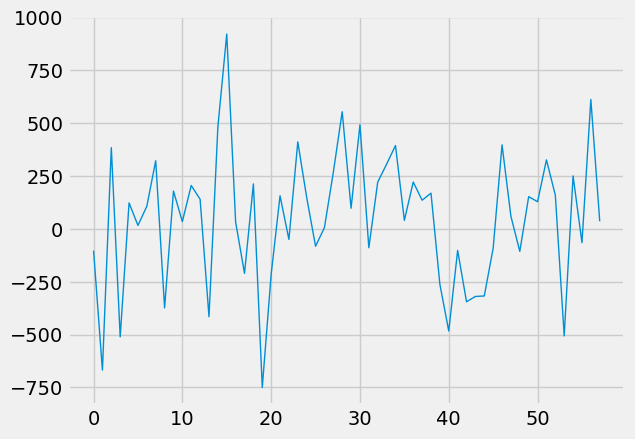

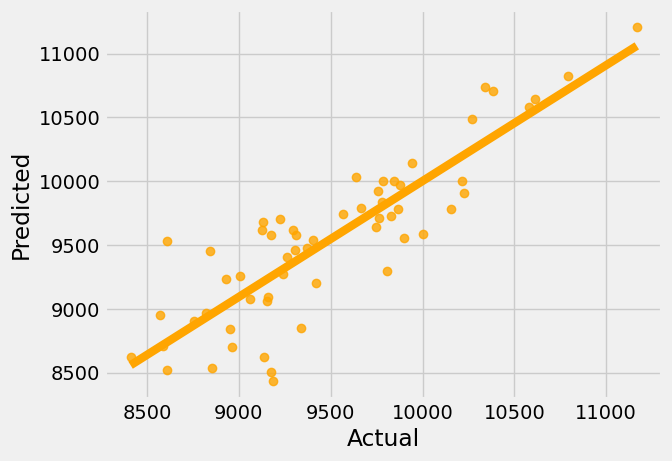

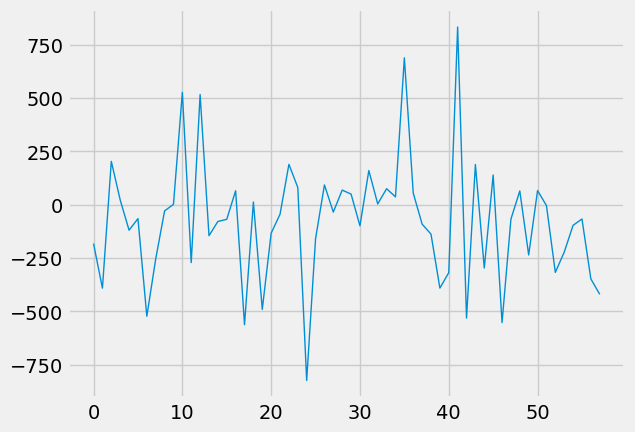

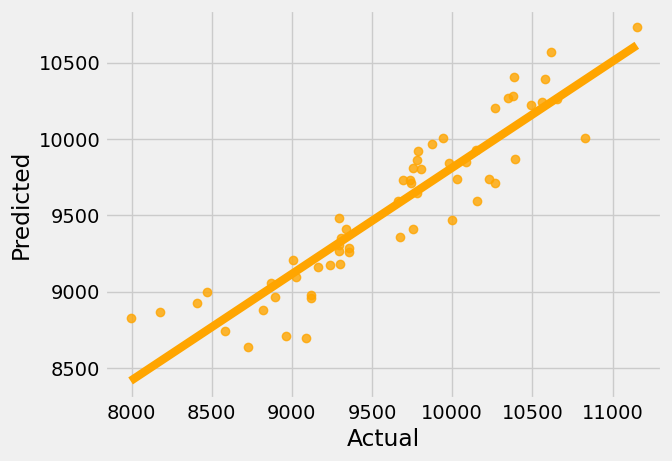

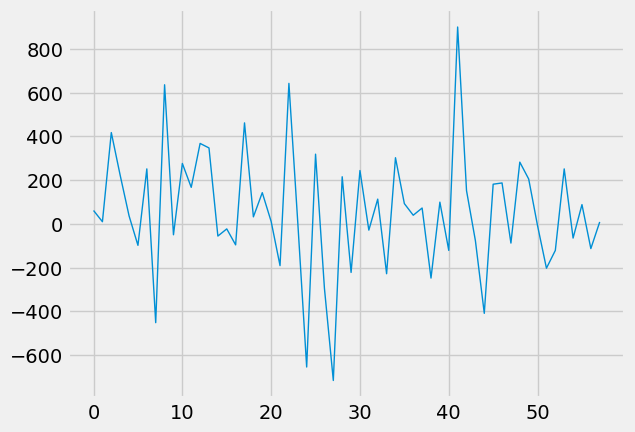

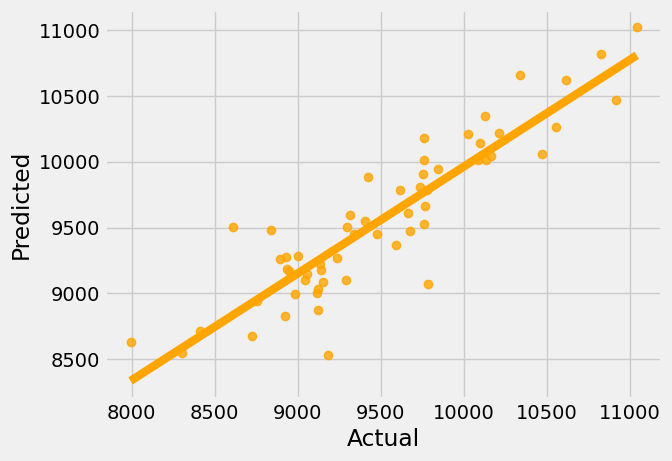

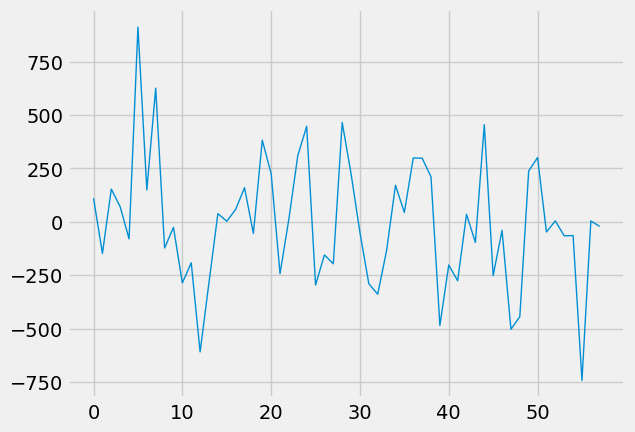

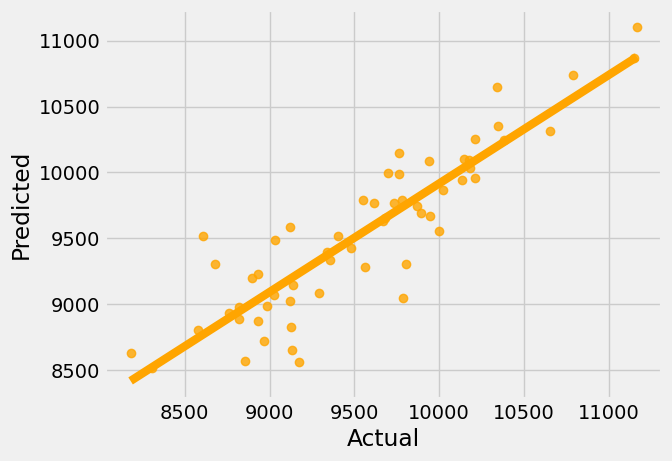

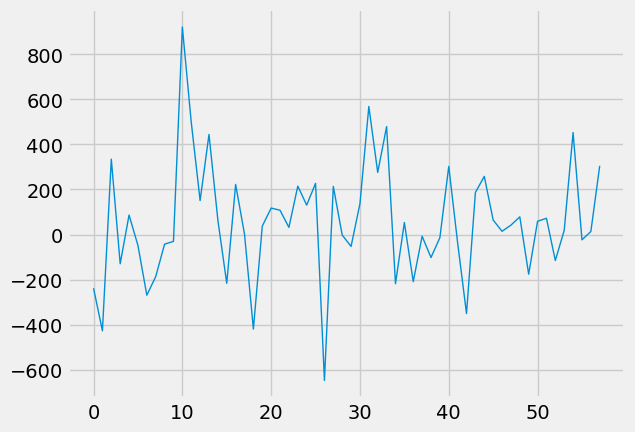

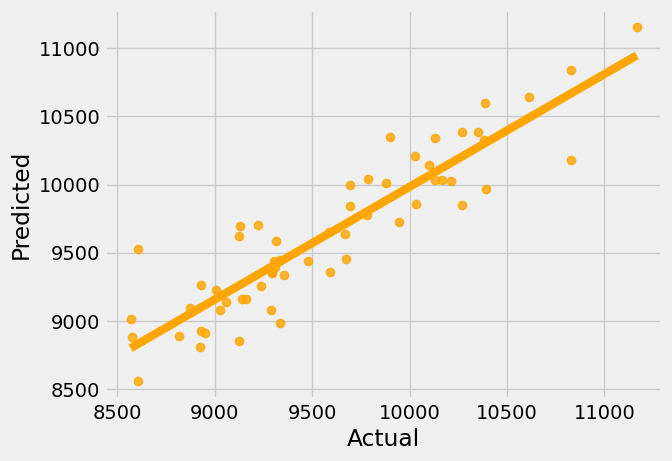

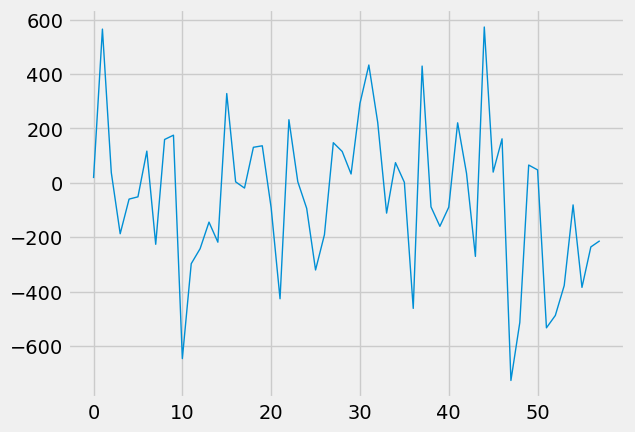

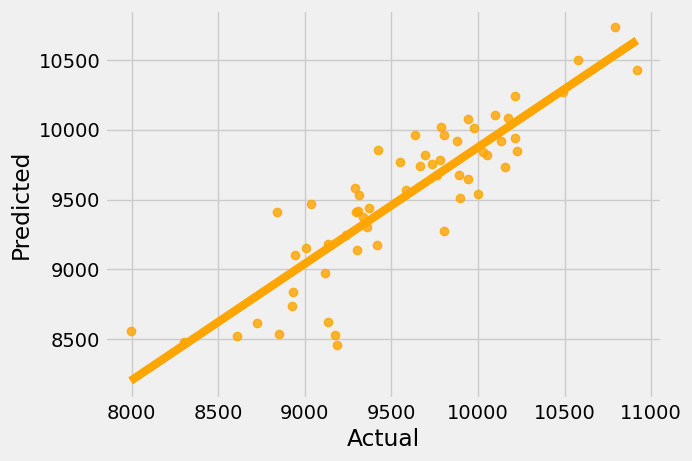

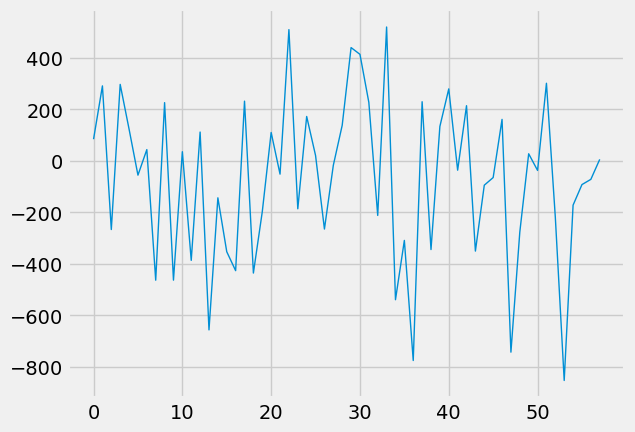

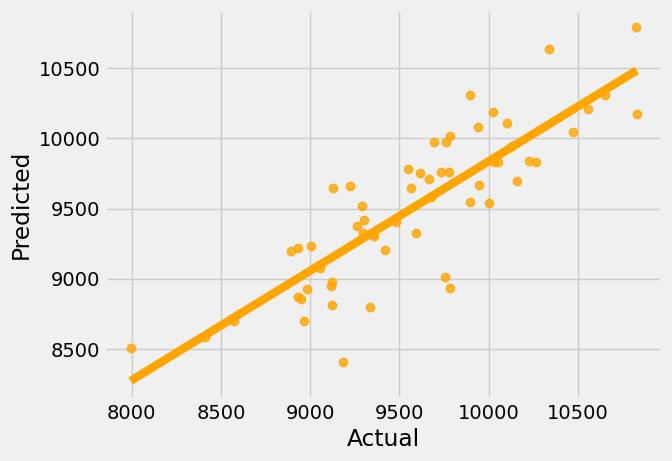

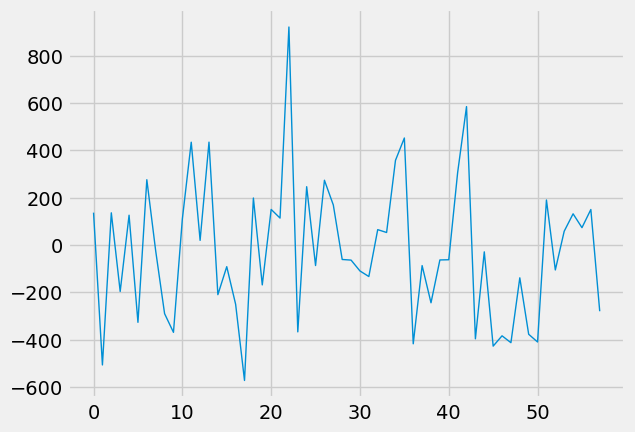

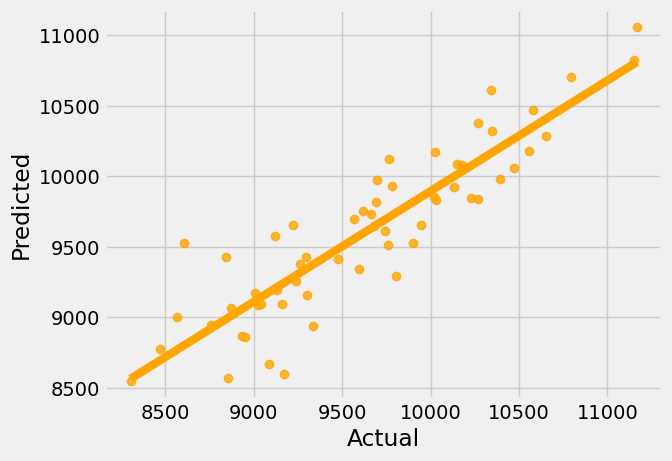

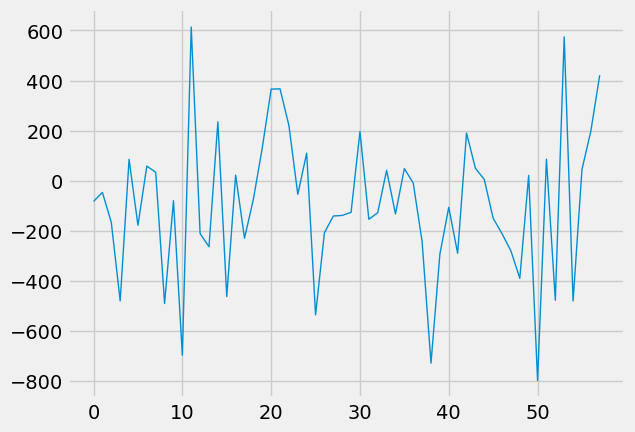

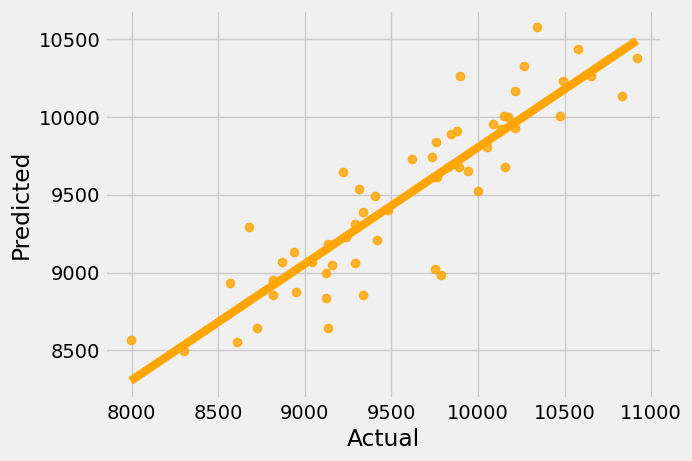

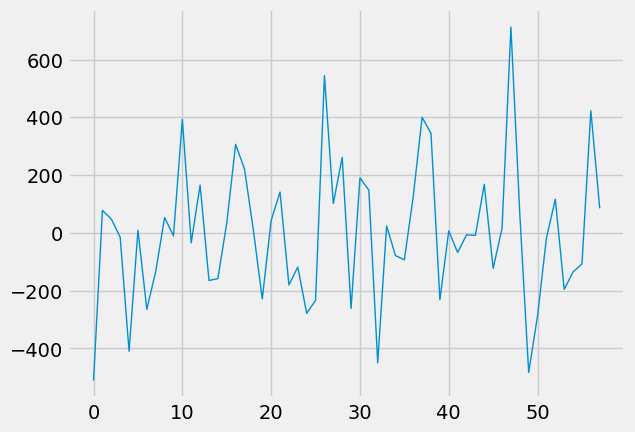

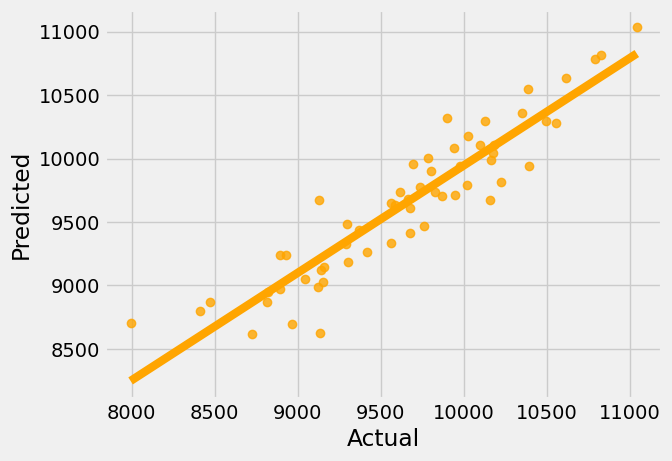

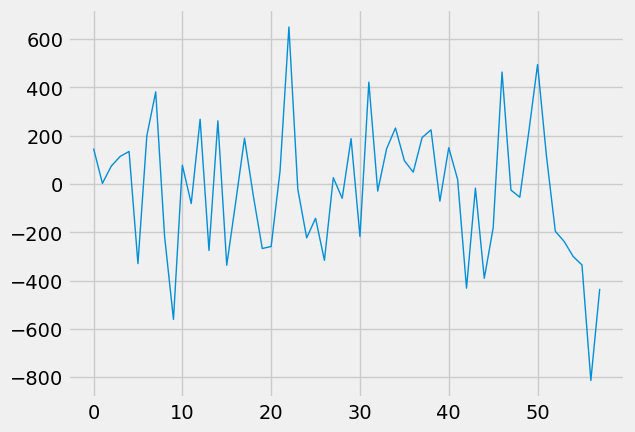

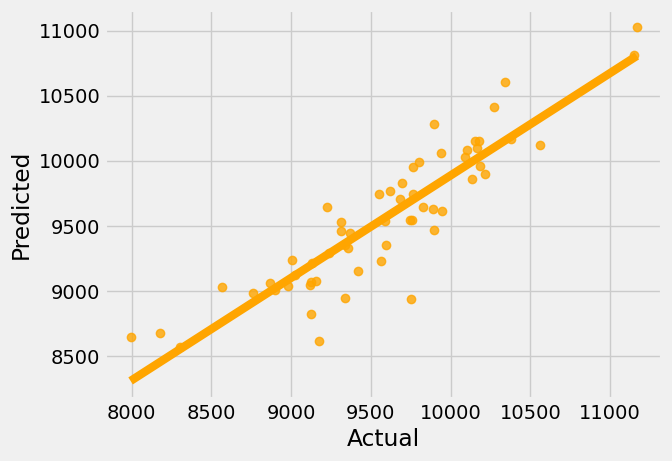

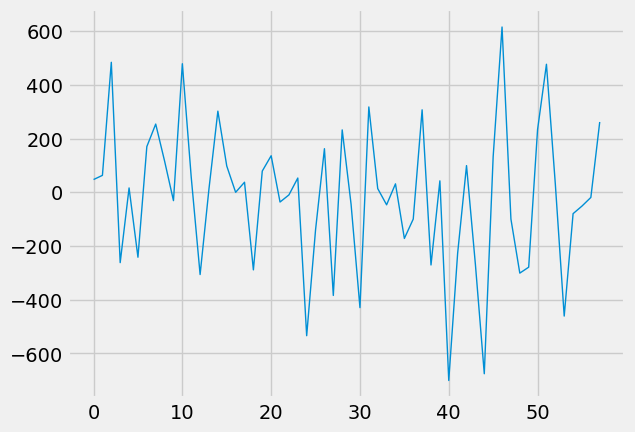

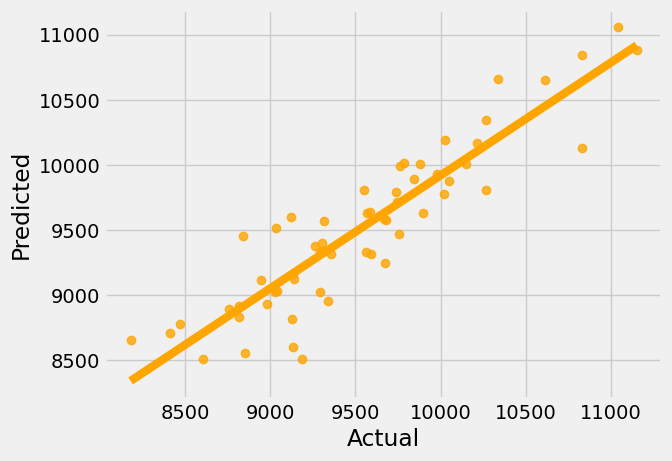

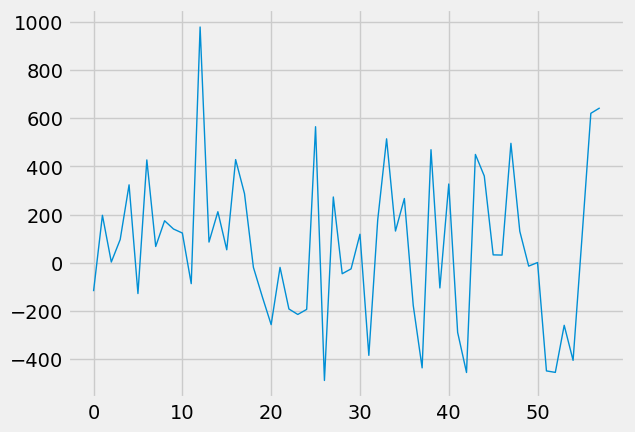

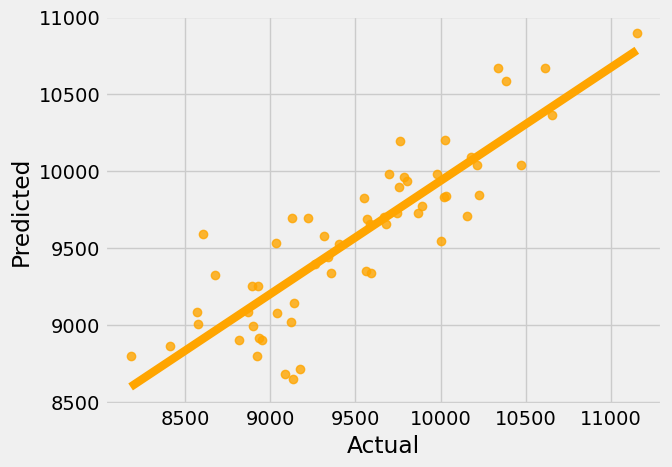

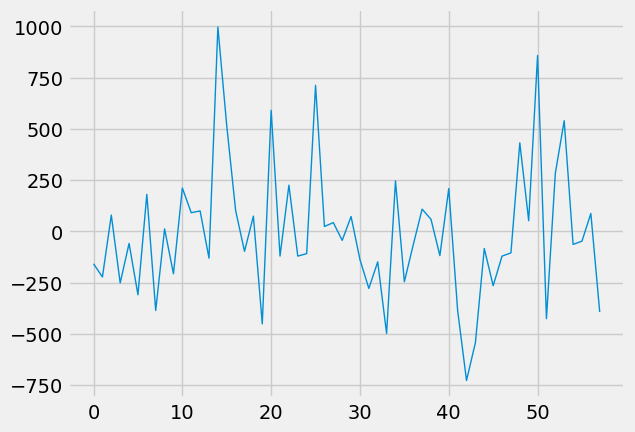

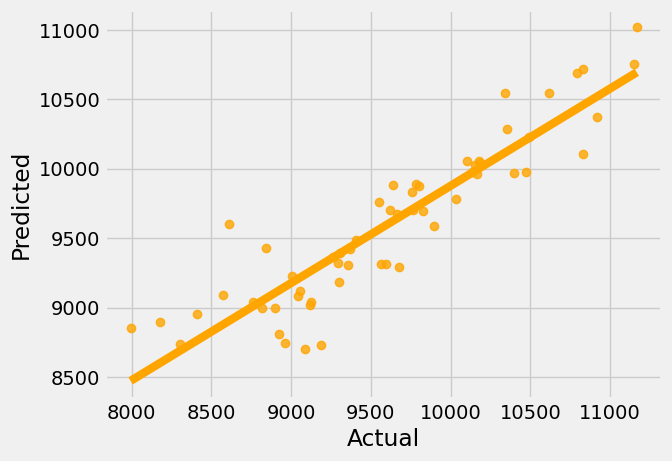


 List of RMSE:
 [323.66600154 311.85481698 313.21678921 307.8440257  320.52893244
 274.5898905  269.75318557 279.99208376 294.39966004 327.40615929
 321.58279917 289.22727885 286.94886852 287.28487655 350.17594645
 286.24902442 324.6393548  303.24363361 289.28167252 298.63251466
 266.88170082 283.38612223 324.73458124 295.5102939  306.69433036
 241.08324806 273.47694247 271.4507045  321.98556528 329.1134973 ]

 List of R^2:
 [0.75661588 0.80774658 0.79507992 0.76867181 0.73855008 0.78910809
 0.82458713 0.80015567 0.77873015 0.71983365 0.71532383 0.77971375
 0.82286841 0.80939767 0.68820816 0.81557849 0.70942047 0.80709899
 0.80282543 0.7961725  0.81333893 0.76173571 0.68638717 0.80361911
 0.77120457 0.85827846 0.80868315 0.82181797 0.72921178 0.80969348]

 mean_rmse:  299.1611500249799 
 std_rmse: 23.66835560449783

 mean_rsq: 0.7796552334915531 
 std_rsq: 0.04303661801786395


In [54]:
max_exp = 30
rmse_list = np.zeros(max_exp)
rsq_list = np.zeros(max_exp)

for i in range(0,max_exp):

    x_train, x_test, y_train, y_test = get_data(datafile, normalise, i)
    rmse, rsquared, coef = scikit_linear_mod(x_train, x_test, y_train, y_test)

    rmse_list[i] = rmse
    rsq_list[i] = rsquared 


print('\n List of RMSE:\n', rmse_list)
# Explained variance score: 1 is perfect prediction 
print('\n List of R^2:\n', rsq_list)

mean_rmse = np.mean(rmse_list)
std_rmse = np.std(rmse_list)

mean_rsq = np.mean(rsq_list)
std_rsq = np.std(rsq_list)

print('\n mean_rmse: ', mean_rmse, '\n std_rmse:', std_rmse)
print('\n mean_rsq:', mean_rsq, '\n std_rsq:', std_rsq )

### Linear Model (Peak Demand with Degree Days) with regularisation, Random Forest Regressor and Gradient Boosting Regressor model 

In [55]:
X1 = peakDemand_w_DD.iloc[:,[0,2,3]].values
transformer = MinMaxScaler().fit(X1)  # fit does nothing.
X1 = transformer.transform(X1)
y1 = peakDemand_w_DD.iloc[:, 1].values

In [56]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.4, random_state = 42)

In [57]:
pipelines={
'rf':make_pipeline(RandomForestRegressor(random_state=42)),
'gb':make_pipeline(GradientBoostingRegressor(random_state=42)),
'ridge':make_pipeline(Ridge(random_state=42)),
'lasso':make_pipeline(Lasso(random_state=42)),
'enet':make_pipeline(ElasticNet(random_state=42)),
# 'knn': make_pipeline(KNeighborsRegressor(random_state=42)),
# 'cart': make_pipeline(tree.DecisionTreeRegressor(random_state=42)),
    
}

In [58]:
hyperparagrid={

'rf':{
'randomforestregressor__min_samples_split':[2,4,6],
'randomforestregressor__min_samples_leaf':[1,2,3]
},
    
'gb':{
    'gradientboostingregressor__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
},

'ridge':{
    'ridge__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
},
'lasso':{
    'lasso__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
},
'enet':{
   'elasticnet__alpha':[0.001,0.005,0.01,0.05,0.1,0.5,0.99]
}

}

In [59]:
fit_models={}
for algo,pipeline in pipelines.items():
    model=GridSearchCV(pipeline,hyperparagrid[algo],cv=10,n_jobs=-1)
    try:
        print('Start training for {}'.format(algo))
        model.fit(X1_train,y1_train)
        fit_models[algo]=model
        #print('{} Train scores-R2:{} Train RMSE:{}'.format(algo,r2_score(y1_train,model), np.sqrt(mean_squared_error(y1_train,model))))
    except NotFittedError as e:
        print(repr(e))


Start training for rf
Start training for gb
Start training for ridge
Start training for lasso
Start training for enet


In [60]:
for algo,model in fit_models.items():
    ymd=model.predict(X1_test)
    print('{} Test scores-R2:{} Test RMSE:{}'.format(algo,r2_score(y1_test,ymd), np.sqrt(mean_squared_error(y1_test,ymd))))

rf Test scores-R2:0.853441552920033 Test RMSE:211.21322181195652
gb Test scores-R2:0.8420743461421407 Test RMSE:219.25121857330478
ridge Test scores-R2:0.7672489848271008 Test RMSE:266.17144720189157
lasso Test scores-R2:0.7663830375475832 Test RMSE:266.66613130475304
enet Test scores-R2:0.7672686551956356 Test RMSE:266.16019955796406


In [61]:
best_model=fit_models['rf']

In [ ]:
best_model

In [ ]:
model